In [275]:
# Copyright © 2016 by Marena Trinidad. All rights reserved.

In [276]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
from rdkit.Chem import FragmentCatalog
from rdkit import Chem
from rdkit import RDConfig
import matplotlib as plt
%matplotlib inline
sns.set_style("darkgrid")

In [106]:
db_sizes = [500, 1000, 2000, 3000, 5000, 10000, 15000, 20000, 30000, 35000, 40000, 45000, 60000]
dbs = [500, 1000, 2000, 3000]
db_list = dict()
for s in dbs:
    smi_name = str(s) + "smiles"
    file_path = "/Users/marenaisabelle/CODE/GADSI/FinalDrafts/" + smi_name
    temp = pd.read_csv(file_path, header=None)  
    db_list[s] = [x for x in temp[0]]
temp = pd.read_csv("/Users/marenaisabelle/CODE/GADSI/FinalDrafts/51ksmiles", header=None)
db_list[10000] = [x for x in temp[0]]
temp = pd.read_csv("/Users/marenaisabelle/CODE/GADSI/FinalDrafts/53ksmiles", header=None)
db_list[5000] = [x for x in temp[0]]
temp = pd.read_csv("/Users/marenaisabelle/CODE/54ksmilescopy", header=None)
db_list[15000] = [x for x in temp[0]]
temp = pd.read_csv("/Users/marenaisabelle/CODE/57ksmilescopy", header=None)
db_list[20000] = [x for x in temp[0]]
temp = pd.read_csv("/Users/marenaisabelle/CODE/511ksmilescopy", header=None)
db_list[30000] = [x for x in temp[0]]
temp = pd.read_csv("/Users/marenaisabelle/CODE/517ksmilescopy", header=None)
db_list[35000] = [x for x in temp[0]]
temp = pd.read_csv("/Users/marenaisabelle/CODE/526ksmilescopy", header=None)
db_list[40000] = [x for x in temp[0]]
temp = pd.read_csv("/Users/marenaisabelle/CODE/45ksm", header=None)
db_list[45000] = [x for x in temp[0]]
temp = pd.read_csv("/Users/marenaisabelle/CODE/60ksm", header=None)
db_list[60000] = [x for x in temp[0]]

In [107]:
# GENERATE A FRAGMENT CATALOG FOR EACH DB SAMPLING AND FIND SIZE OF FRAG SPACE
fName = os.path.join(RDConfig.RDDataDir,'FunctionalGroups.txt')
frag_amts = []

for db in db_sizes[-1:]:
    fparams = FragmentCatalog.FragCatParams(1,6,fName)
    cat = FragmentCatalog.FragCatalog(fparams)
    fcgen = FragmentCatalog.FragCatGenerator()
    temp = db_list[db]
    
    for s in temp:
        try:
            m = Chem.MolFromSmiles(s)
        except Exception as e:
            pass
        try:
            nAdded=fcgen.AddFragsFromMol(m, cat)
        except Exception as e:
            pass
    size = cat.GetNumEntries()
    t = (db, size)
    frag_amts.append(t)

In [271]:
import matplotlib.pyplot as plt
%pylab inline
yt = [45194, 72200, 120492, 156677, 236069, 347939, 445289, 532911, 620588, 741139, 779322, 839984, 986224]

Populating the interactive namespace from numpy and matplotlib


/Users/marenaisabelle/anaconda/envs/my-rdkit-env/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['poly']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [267]:
# PREPARE PLOT
db_size = [500, 1000, 2000, 3000, 5000, 10000, 15000, 20000, 30000, 35000, 40000, 45000, 60000]
xi = [500, 1000, 2000, 3000, 5000, 10000, 15000, 20000, 30000, 35000, 40000, 45000, 60000, 
        75000, 100000, 120000, 140000, 160000, 180000, 200000, 220000, 230000, 250000, 270000, 300000]

In [245]:
z = np.polyfit(db_size, np.log(yt), 1)

In [246]:
print z

[  4.39566404e-05   1.17723326e+01]


In [255]:
zx = lambda x: 4.39566404e-05 + 11.772332583482433*x

In [268]:
new = [zx(i) for i in xi]

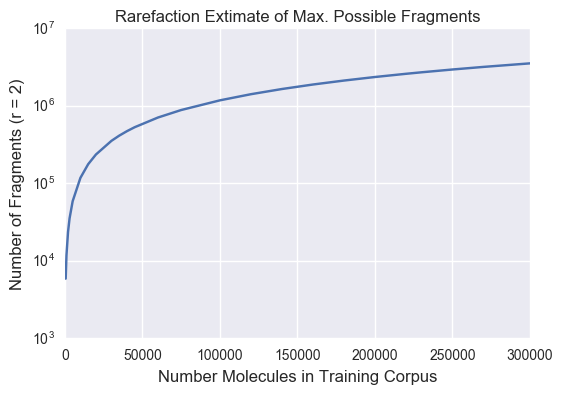

In [270]:
ax = plot(xi, new)
_=yscale("log")
_=xlabel('Number Molecules in Training Corpus', fontsize=12)
_=ylabel('Number of Fragments (r = 2)', fontsize=12)
_=title('Rarefaction Extimate of Max. Possible Fragments', fontsize=12)

In [278]:
# LOAD DATA
chem_lib = pd.read_csv('/Users/marenaisabelle/CODE/GADSI/fulldf') # Train Chemical df: PCID, Activity, SMILES
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem

frag_amts = []
fparams = FragmentCatalog.FragCatParams(1,6,fName)
cat = FragmentCatalog.FragCatalog(fparams)
fcgen = FragmentCatalog.FragCatGenerator()
temp = db_list[db]
    
for s in chem_lib['Smiles']:
    try:
        m = Chem.MolFromSmiles(s)
    except Exception as e:
        pass
    try:
        nAdded=fcgen.AddFragsFromMol(m, cat)
    except Exception as e:
        pass
size = cat.GetNumEntries()
t = (db, size)
frag_amts.append(t)

In [280]:
print frag_amts

[(60000, 233064)]
